# Teorema de Separação de Fundos e Linha de Mercado de Capitais

## Maximum Sharpe Ratio Portfolio (MSR)

Abordagem científica para diversificação. O **portifólio de tangência** é o portfólio que maximiza o Sharpe Ratio.

$$SR_p = \dfrac{\mu_p - r_f}{\rho_p} = \dfrac{\sum_{i=1}^N w_i\mu_i - r_r}{\sqrt{\sum_{i,j=1}^N w_i w_j \sigma_i \sigma_j \rho_{ij}}}$$

## Encontrando o Máximo Índice de Sharpe 

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import  minimize
import risk_toolkit as rt

plt.style.use('seaborn')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ind = rt.get_ind_returns()
er = rt.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

### Gráfico da Fronteira Eficiente

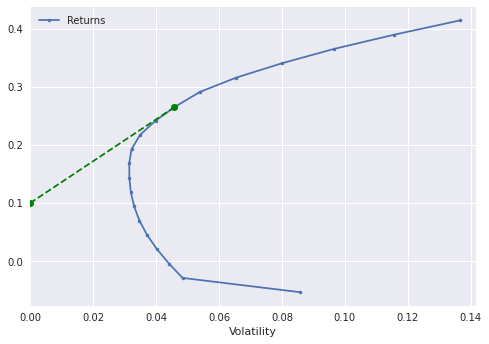

In [15]:
ax = rt.plot_ef(er, cov, 20)
ax.set_xlim(left = 0)

rf = 0.1
w_msr = rt.msr(rf, er, cov)
r_msr = rt.portfolio_return(w_msr, er)
vol_msr = rt.portfolio_vol(w_msr, cov)

# Add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]


ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed')

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility', ylabel='Returns'>

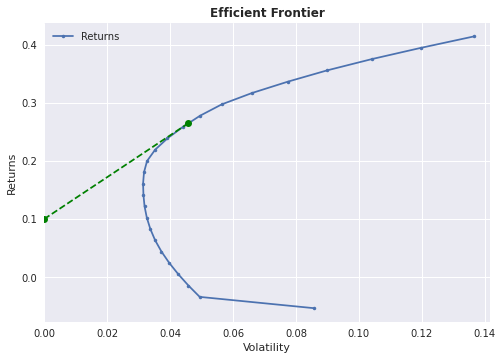

In [20]:
rt.plot_ef(er, cov, riskfree_rate=0.1, show_cml=True)